In [ ]:
# Mapping the cell type's from Extended Mouse Gastrulation Atlas


# Loading the settings, utils and objects

In [1]:
source("/home/ridvan/scRIPT/settings.R")
source("/home/ridvan/scRIPT/utils.R")

In [2]:
BPPARAM <- BiocParallel::bpparam()
BPPARAM$workers = 30

# Multi core using future - built in to seurat
plan("multicore", workers = 30)
options(future.globals.maxSize = 300 * 1024 ^ 3) # for 300 Gb RAM

getwd()

[1] "/home/ridvan/PhD_Projects/CMO/Bioinformatic_Analysis/step10_mapping"

In [3]:
io$output_rds_dir

[1] "/home/ridvan/scRIPT/000_io_dir/outputs/rds_files/"

In [4]:
atlas <- readRDS(paste0(io$output_rds_dir, 'extended_atlas_cellranger_features_seurat.rds'))

In [5]:
atlas

An object of class Seurat 
27669 features across 430339 samples within 1 assay 
Active assay: originalexp (27669 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: UMAP, PCA

In [6]:
obj <- readRDS('../../cmoy2_reup.RDS')
obj

An object of class Seurat 
27998 features across 71107 samples within 1 assay 
Active assay: RNA (27998 features, 0 variable features)
 2 layers present: counts, data
 6 dimensional reductions calculated: OLDPCA, OLDUMAP, OLDTSNE, PCA, UMAP, UMAP3D

In [7]:
table(obj$lv_subclusters)


     Naive       Epib        PST     EcXSfn   EcXCldn3   EcXAnxa1        PGC 
      1135        982        557        445        500        120        474 
   PSMesp1    EnXFgf5     EnXTtr  MesoMixl1     bFgf15   bCacna1d     bNrxn3 
       503        171        223       1577       1947       2435       1239 
   bStard8     bUpk3b    bPlxna4     aGreb1     aDach1     aActc1    aIgfbp7 
      2454       5853      10050       1836       3351       5179       5863 
   aWnt2G1 aFgf12SG2M    baIfit1        BPr      Ery1a      Ery1b       Ery2 
      8355       6286        202       1025        971        502        487 
      Ery3      MegP1      MegP2      MegP3 EndGadd45g    EndCdh5 EndCyp26b1 
      1438        345        106        407        807        731        199 
  EndRsad2    EMPNrg1  EMPIl17ra    EMPCcl4   EMPSepp1 
        54        427        309        738        824 

# Creating Integrated version of the Atlas



In [8]:
# Calculate and add percentage of mitochondrial genes
atlas[["percent.mt"]] <- PercentageFeatureSet(atlas, pattern = "^mt-")

# Calculate and add percentage of ribosomal genes
atlas[["percent.ribo"]] <- PercentageFeatureSet(atlas, pattern = "(^Rpl|^Rps)")

# Subsetting the Atlas for compute-lite version

I will match the number of the cells for each stage to number of the cells in mixed_gastrulation stage which is 7455 cells

In [9]:
Idents(atlas) <- atlas$stage
levels(Idents(atlas))

[1] "E6.5"               "E7.5"               "E6.75"             
 [4] "E7.75"              "E7.0"               "E8.0"              
 [7] "E8.5"               "Mixed gastrulation" "E7.25"             
[10] "E8.25"              "E9.0"               "E8.75"             
[13] "E9.25"              "E9.5"

In [10]:
table(atlas$stage)


              E6.5              E6.75               E7.0              E7.25 
              3484               2075              14749              13537 
              E7.5              E7.75               E8.0              E8.25 
             10994              14493              16681              15935 
              E8.5              E8.75               E9.0              E9.25 
             58072              68910              93020              71303 
              E9.5 Mixed gastrulation 
             39631               7455 

In [11]:
min(table(atlas$stage))
max(table(atlas$stage))

[1] 2075

[1] 93020

In [12]:
atlas

An object of class Seurat 
27669 features across 430339 samples within 1 assay 
Active assay: originalexp (27669 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: UMAP, PCA

In [13]:
atlas <- subset(atlas, downsample = 7455)

In [14]:
atlas

An object of class Seurat 
27669 features across 95019 samples within 1 assay 
Active assay: originalexp (27669 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: UMAP, PCA

## Filtering out uninformative genes

In [15]:
# Intersect genes
genes.intersect <- intersect(rownames(obj),  rownames(atlas))
length(genes.intersect)

[1] 27669

In [16]:
## getting gene_metadata that will be used for filtering genes
# Gene metadata
edb       <- EnsDb.Mmusculus.v79
all_genes <- genes(edb, columns=c("gene_id","gene_name"))
# see what columns are actually present
gene_metadata        <- as.data.frame(all_genes)
head(gene_metadata)

,seqnames,start,end,width,strand,gene_id,gene_name
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>
ENSMUSG00000102693,1,3073253,3074322,1070,+,ENSMUSG00000102693,RP23-271O17.1
ENSMUSG00000064842,1,3102016,3102125,110,+,ENSMUSG00000064842,Gm26206
ENSMUSG00000051951,1,3205901,3671498,465598,-,ENSMUSG00000051951,Xkr4
ENSMUSG00000102851,1,3252757,3253236,480,+,ENSMUSG00000102851,RP23-317L18.1
ENSMUSG00000103377,1,3365731,3368549,2819,-,ENSMUSG00000103377,RP23-317L18.4
ENSMUSG00000104017,1,3375556,3377788,2233,-,ENSMUSG00000104017,RP23-317L18.3


In [17]:
imprint_genes

[1] "Zdbf2"         "Adam23"        "Mcts2"         "Mir296"       
  [5] "Mir298"        "Sfmbt2"        "Nnat"          "Zfp64"        
  [9] "Nespas"        "Jade1"         "Magi2"         "Fkbp6"        
 [13] "Peg10"         "Sgce"          "Mest"          "Nap1l5"       
 [17] "Peg3os"        "Usp29"         "Peg3"          "Zfp264"       
 [21] "Peg12"         "Magel2"        "Ndn"           "Mkrn3"        
 [25] "Snrpn"         "Pwcr1"         "Igf2as"        "Ins2"         
 [29] "Kcnq1ot1"      "Inpp5f"        "Nctc1"         "Igf2"         
 [33] "Snurf"         "Gab1"          "Sall1"         "Cdh15"        
 [37] "Snx14"         "Mir184"        "Rasgrf1"       "Hymai"        
 [41] "Plagl1"        "Platr20"       "Ddc"           "U2af1-rs1"    
 [45] "Ccdc40"        "Smoc1"         "Dlk1"          "Dio3"         
 [49] "Rtl1"          "Galnt6"        "Peg13"         "Slc38a4"      
 [53] "Air"           "Impact"        "Fthl17b"       "Fthl17c"      
 [57] "Fthl17d"       "Fthl17e"       "Fthl17f"       "Fthl17a"      
 [61] "Jpx"           "Ftx"           "Xist"          "Gatm"         
 [65] "H13"           "Pon3"          "Ppp1r9a"       "Tfpi2"        
 [69] "Asb4"          "Calcr"         "Mir335"        "Aqp1"         
 [73] "Pon2"          "Copg2"         "Klf14"         "Ano1"         
 [77] "Nlrp2"         "AF313042"      "Zim1"          "Zim3"         
 [81] "Axl"           "Ube3a"         "Zfp127as"      "Ampd3"        
 [85] "H19"           "Kcnq1"         "Ascl2"         "Tssc4"        
 [89] "Cd81"          "Phlda2"        "Slc22a18"      "Cdkn1c"       
 [93] "Nap1l4"        "Tnfrsf23"      "Tnfrsf22"      "Tnfrsf26"     
 [97] "Mir675"        "Th"            "Dhcr7"         "Zim2"         
[101] "Dcn"           "Commd1"        "Mir337"        "Mir410"       
[105] "Mir380"        "AF357355"      "AF357359"      "Mir127"       
[109] "Mir136"        "B830012L14Rik" "Mir411"        "Mir376b"      
[113] "Mir431"        "Gtl2"          "AF357341"      "AF357425"     
[117] "AF357426"      "AF357428"      "Rian"          "Mir370"       
[121] "Mirg"          "Htr2a"         "Trappc9"       "Chrac1"       
[125] "Kcnk9"         "Qpct"          "Pde10a"        "Dact2"        
[129] "Prkn"          "Slc22a3"       "Slc22a2"       "Thbs2"        
[133] "Smoc2"         "Gm35612"       "Rhox5"         "Xlr3b"        
[137] "Tsix"          "Zcchc13"       "Maged2"        "Grb10"

In [18]:
# Filter some genes manually
genes.intersect <- genes.intersect[grep("^mt-|^Rps|^Rpl",genes.intersect,invert=T)] # filter out non-informative genes
genes.intersect <- genes.intersect[grep("^Hbb|^Hba",genes.intersect,invert=T)] # test removing Haem genes 
genes.intersect <- genes.intersect[!genes.intersect %in% c(imprint_genes, 'Grb10', 'Nnat')] # remove imprinted genes
genes.intersect <- genes.intersect[!genes.intersect %in% c("Xist", "Tsix")] # remove Xist & Tsix
genes.intersect <- genes.intersect[!genes.intersect %in% gene_metadata[gene_metadata$seqnames=="Y",'gene_name']] # no genes on y-chr 
length(genes.intersect)

[1] 26810

In [19]:
# Extract raw counts matrix
counts_mat <- GetAssayData(atlas, assay = "originalexp", slot = "counts")

# Sum counts across all cells for each gene
gene_totals <- Matrix::rowSums(counts_mat)

# Filter genes with total counts less than 16
low_count_genes <- names(gene_totals[gene_totals < 16]) # skip for the optimzation step

# View or use the result
length(low_count_genes)  # Number of genes # skip for the optimzation step
head(low_count_genes)    # Preview # skip for the optimzation step


Warning message:
"The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead."


[1] 8365

[1] "Gm1992"  "Gm37381" "Gm37323" "Gm16041" "Gm29520" "Gm15818"

In [20]:
genes.intersect <- genes.intersect[!genes.intersect %in% low_count_genes]
length(genes.intersect)

[1] 19070

In [21]:
# low count genes:: From query
# Extract raw counts matrix
counts_mat <- GetAssayData(obj, assay = "RNA", slot = "counts")

# Sum counts across all cells for each gene
gene_totals <- Matrix::rowSums(counts_mat)

# Filter genes with total counts less than 16
low_count_genes <- names(gene_totals[gene_totals < 16])

# View or use the result
length(low_count_genes)  # Number of genes
head(low_count_genes)    # Preview


[1] 7203

[1] "Gm37381" "Rp1.1"   "Gm37323" "Gm16041" "Gm29520" "Gm17644"

In [22]:
genes.intersect <- genes.intersect[!genes.intersect %in% low_count_genes]
length(genes.intersect)

[1] 18273

In [23]:
seurat_atlas <- subset(atlas, features = genes.intersect)

In [24]:
seurat_query <- subset(obj, features = genes.intersect)

In [25]:
seurat_atlas

An object of class Seurat 
18273 features across 95019 samples within 1 assay 
Active assay: originalexp (18273 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: UMAP, PCA

In [26]:
seurat_query

An object of class Seurat 
18273 features across 71107 samples within 1 assay 
Active assay: RNA (18273 features, 0 variable features)
 2 layers present: counts, data
 6 dimensional reductions calculated: OLDPCA, OLDUMAP, OLDTSNE, PCA, UMAP, UMAP3D

# Mapping Directly - without integration

In [27]:
rm(obj)
rm(atlas)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,12961370,692.3,22429435,1197.9,22429435,1197.9
Vcells,2136323933,16298.9,6185267906,47189.9,9505217370,72519.1


## with 4000 variable features (4k) with 50 pca (v4k_pca50)

In [28]:
rm(listmap)

Warning message in rm(listmap):
"object 'listmap' not found"


In [46]:
listmap <- list()
listmap$nvariables <- 4000
listmap$regress <-  c("nFeature_originalexp", "nCount_originalexp", "percent.mt", "percent.ribo", "G2M_score", "S_score")
listmap$pca_name <- 'v4k_pca50'
listmap$pca_name2 <- 'v4k_pca50_'
listmap$npcs = 50
listmap$dims = 1:50
listmap$umap = 'UMAP'
listmap$mapped_id <- 'v4k_pca50_predicted.id'
listmap$mapped_score <- 'v4k_pca50_prediction.score.max'

In [30]:
# Findvariable Features
seurat_atlas <- FindVariableFeatures(object = seurat_atlas, nfeatures = listmap$nvariables)

In [31]:
# Regression
seurat_atlas <- ScaleData(object = seurat_atlas, 
                          features = VariableFeatures(seurat_atlas),
                          vars.to.regress = listmap$regress,
                          block.size = 20000)

Warning message:
"The `slot` argument of `SetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>."
Regressing out nFeature_originalexp, nCount_originalexp, percent.mt, percent.ribo, G2M_score, S_score

Centering and scaling data matrix



In [32]:
length(VariableFeatures(seurat_atlas))

[1] 4000

In [33]:
# Run PCA 
seurat_atlas <- RunPCA(seurat_atlas,
                       reduction.name = listmap$pca_name,
                       npcs = listmap$npcs, 
                       features =  VariableFeatures(seurat_atlas)
                      )

PC_ 1 
Positive:  Folr1, Apom, Amn, Rbp4, Apoa1, Ttr, Ctsh, Cubn, Apoa4, 2610528J11Rik 
	   Lgals2, Apob, Pla2g12b, Tmem37, Mt1, Car7, Aldob, Fgb, Spink1, Trap1a 
	   2210011C24Rik, Slc2a2, Lgmn, Slc39a5, 4933402E13Rik, Gipc2, Fmr1nb, Apoc1, Apoe, Reep6 
Negative:  Tmsb10, Tuba1a, Ifitm2, Marcks, 2810417H13Rik, Basp1, Gnas, Hmga2, Vim, Cald1 
	   Mdk, Marcksl1, Nedd4, Acta2, Sox4, Tpm4, Tpm1, H2afy2, Fscn1, Serpinh1 
	   Ttc3, Tagln, Eid1, Stmn1, Tmsb4x, Fabp5, Hmgb3, Nrp1, Ccnd2, Cnn2 
PC_ 2 
Positive:  Car2, Elf5, Fabp3, Hdgf, Gypa, Gjb3, Prss50, Alas2, Gpx1, Perp 
	   Tex19.1, Dppa4, Htra1, Gm9, Nr0b1, Sfn, Zfp42, Ccnd3, Ddah1, Cldn3 
	   Mrap, Slc4a1, Blvrb, Gjb5, Cited4, Trim10, Tfap2c, Slc25a37, Hemgn, Klf1 
Negative:  Mdk, Gpc3, Bex2, Ctsl, Apom, Pla2g12b, Dab2, Apoa4, Id3, Ctsh 
	   Amn, Aldob, Lgals2, Car7, Fgb, Cubn, Stmn1, Apoa1, Gipc2, Crabp2 
	   Ttr, Serpinh1, Slc2a2, Slc39a5, Apob, Pcbd1, Hsp90b1, Sox11, 2210011C24Rik, Rbp4 
PC_ 3 
Positive:  Gypa, Alas2, Prdx2, Cited4, 

In [34]:
# with merged_pca (no integration)
anchors <- FindTransferAnchors(reference = seurat_atlas, query = seurat_query, dims = listmap$dims, reference.reduction = listmap$pca_name)
predictions <- TransferData(anchorset = anchors, refdata = seurat_atlas$celltype_extended_atlas, dims = listmap$dims )

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 2966 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [35]:
predictions_short <- predictions[, c('predicted.id','prediction.score.max')]
colnames(predictions_short) <- paste0(listmap$pca_name2, colnames(predictions_short))
head(predictions_short)

,v4k_pca50_predicted.id,v4k_pca50_prediction.score.max
,<chr>,<dbl>
AAACCCAAGAATTCAG-1_1,Epiblast,0.8264762
AAACCCAAGATCACCT-1_1,Mesenchyme,0.6087842
AAACCCAAGCAGGGAG-1_1,Pharyngeal mesoderm,0.3057151
AAACCCAAGCGCAATG-1_1,Mesenchyme,0.4664694
AAACCCAAGCTGGTGA-1_1,Allantois,0.6442121
AAACCCAAGGGCCAAT-1_1,EMP,0.9537897


In [36]:
seurat_query <- AddMetaData(seurat_query, metadata = predictions_short)

# make sure your UMAP reduction name is correct
reduction_to_plot <- listmap$umap    # or "pca_harmony_umap_1" if that really is your slot

# get all the unique extended‐type labels (including NA if present)
conditions <- unique(seurat_query@meta.data[,listmap$mapped_id])

Idents(seurat_query) <- listmap$mapped_id

options(repr.plot.width=8, repr.plot.height=6)
for (cond in conditions) {
	# skip NA if you don't care to plot it
	if (is.na(cond)) next
	
	# grab the cells of that type
	cells_of_interest <- WhichCells(
		object    = seurat_query,
		 idents =  cond
	)
	
	# make the plot
	p <- DimPlot(
		object          = seurat_query,
		reduction       = reduction_to_plot,
		cells.highlight = cells_of_interest,
		cols.highlight  = "firebrick",   # or any color you like
		cols            = "lightgrey",   # background cells
		pt.size         = 0.5, alpha = 0.5
	) +
		NoAxes()+NoLegend() +
		ggtitle(cond)
	
	print(p)
}


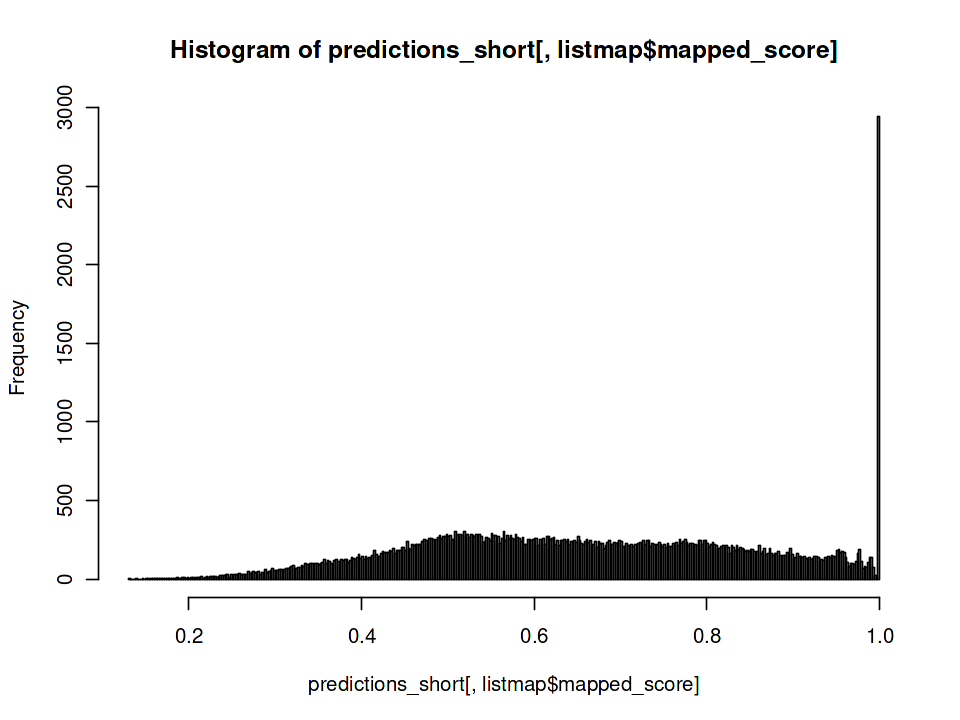

In [38]:
options(repr.plot.width=8, repr.plot.height=6)
hist(predictions_short[,listmap$mapped_score],breaks = 500)

In [39]:
saveRDS(predictions, paste0(listmap$pca_name2,'predictions.rds'))

In [42]:
saveRDS(anchors, paste0(listmap$pca_name2,'anchors.rds'))

## with 4000 variable features (4k) with 75 pca (v4k_pca75)

In [48]:
rm(listmap)

In [49]:
listmap <- list()
listmap$nvariables <- 4000
listmap$regress <-  c("nFeature_originalexp", "nCount_originalexp", "percent.mt", "percent.ribo", "G2M_score", "S_score")
listmap$pca_name <- 'v4k_pca75'
listmap$pca_name2 <- 'v4k_pca75_'
listmap$npcs = 75
listmap$dims = 1:75
listmap$umap = 'UMAP'
listmap$mapped_id <- 'v4k_pca75_predicted.id'
listmap$mapped_score <- 'v4k_pca75_prediction.score.max'

In [50]:
listmap

$nvariables
[1] 4000

$regress
[1] "nFeature_originalexp" "nCount_originalexp"   "percent.mt"          
[4] "percent.ribo"         "G2M_score"            "S_score"             

$pca_name
[1] "v4k_pca75"

$pca_name2
[1] "v4k_pca75_"

$npcs
[1] 75

$dims
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75

$umap
[1] "UMAP"

$mapped_id
[1] "v4k_pca75_predicted.id"

$mapped_score
[1] "v4k_pca75_prediction.score.max"

In [51]:
# Findvariable Features
#seurat_atlas <- FindVariableFeatures(object = seurat_atlas, nfeatures = listmap$nvariables)

In [52]:
# Regression
#seurat_atlas <- ScaleData(object = seurat_atlas, 
#                          features = VariableFeatures(seurat_atlas),
#                          vars.to.regress = listmap$regress,
#                          block.size = 20000)

In [53]:
length(VariableFeatures(seurat_atlas))

[1] 4000

In [54]:
# Run PCA 
seurat_atlas <- RunPCA(seurat_atlas,
                       reduction.name = listmap$pca_name,
                       npcs = listmap$npcs, 
                       features =  VariableFeatures(seurat_atlas)
                      )

PC_ 1 
Positive:  Tmsb10, Tuba1a, Ifitm2, Marcks, 2810417H13Rik, Basp1, Gnas, Hmga2, Vim, Cald1 
	   Mdk, Marcksl1, Nedd4, Acta2, Sox4, Tpm4, Tpm1, H2afy2, Fscn1, Serpinh1 
	   Ttc3, Tagln, Eid1, Stmn1, Tmsb4x, Fabp5, Hmgb3, Nrp1, Ccnd2, Cnn2 
Negative:  Folr1, Apom, Amn, Rbp4, Apoa1, Ttr, Ctsh, Cubn, Apoa4, 2610528J11Rik 
	   Lgals2, Apob, Pla2g12b, Tmem37, Mt1, Car7, Aldob, Fgb, Spink1, Trap1a 
	   2210011C24Rik, Slc2a2, Lgmn, Slc39a5, 4933402E13Rik, Gipc2, Fmr1nb, Apoc1, Apoe, Reep6 
PC_ 2 
Positive:  Car2, Elf5, Fabp3, Hdgf, Gypa, Gjb3, Prss50, Alas2, Gpx1, Perp 
	   Tex19.1, Dppa4, Htra1, Gm9, Nr0b1, Sfn, Zfp42, Ccnd3, Ddah1, Cldn3 
	   Mrap, Slc4a1, Blvrb, Gjb5, Cited4, Trim10, Tfap2c, Slc25a37, Hemgn, Klf1 
Negative:  Mdk, Gpc3, Bex2, Ctsl, Apom, Pla2g12b, Dab2, Apoa4, Id3, Ctsh 
	   Amn, Aldob, Lgals2, Car7, Fgb, Cubn, Stmn1, Apoa1, Gipc2, Crabp2 
	   Ttr, Serpinh1, Slc2a2, Slc39a5, Apob, Pcbd1, Hsp90b1, Sox11, 2210011C24Rik, Rbp4 
PC_ 3 
Positive:  Gypa, Alas2, Prdx2, Cited4, 

In [55]:
# with merged_pca (no integration)
anchors <- FindTransferAnchors(reference = seurat_atlas, query = seurat_query, dims = listmap$dims, reference.reduction = listmap$pca_name)
predictions <- TransferData(anchorset = anchors, refdata = seurat_atlas$celltype_extended_atlas, dims = listmap$dims )

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 2904 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [56]:
predictions_short <- predictions[, c('predicted.id','prediction.score.max')]
colnames(predictions_short) <- paste0(listmap$pca_name2, colnames(predictions_short))
head(predictions_short)

,v4k_pca75_predicted.id,v4k_pca75_prediction.score.max
,<chr>,<dbl>
AAACCCAAGAATTCAG-1_1,Epiblast,0.8556523
AAACCCAAGATCACCT-1_1,Mesenchyme,0.5145252
AAACCCAAGCAGGGAG-1_1,Epicardium,0.2742853
AAACCCAAGCGCAATG-1_1,Mesenchyme,0.5446904
AAACCCAAGCTGGTGA-1_1,Allantois,0.5178056
AAACCCAAGGGCCAAT-1_1,EMP,0.9861749


In [57]:
seurat_query <- AddMetaData(seurat_query, metadata = predictions_short)

In [ ]:
# make sure your UMAP reduction name is correct
reduction_to_plot <- listmap$umap    # or "pca_harmony_umap_1" if that really is your slot

# get all the unique extended‐type labels (including NA if present)
conditions <- unique(seurat_query@meta.data[,listmap$mapped_id])

Idents(seurat_query) <- listmap$mapped_id

options(repr.plot.width=8, repr.plot.height=6)
for (cond in conditions) {
	# skip NA if you don't care to plot it
	if (is.na(cond)) next
	
	# grab the cells of that type
	cells_of_interest <- WhichCells(
		object    = seurat_query,
		 idents =  cond
	)
	
	# make the plot
	p <- DimPlot(
		object          = seurat_query,
		reduction       = reduction_to_plot,
		cells.highlight = cells_of_interest,
		cols.highlight  = "firebrick",   # or any color you like
		cols            = "lightgrey",   # background cells
		pt.size         = 0.5, alpha = 0.5
	) +
		NoAxes()+NoLegend() +
		ggtitle(cond)
	
	print(p)
}


In [59]:
listmap$mapped_id

[1] "v4k_pca75_predicted.id"

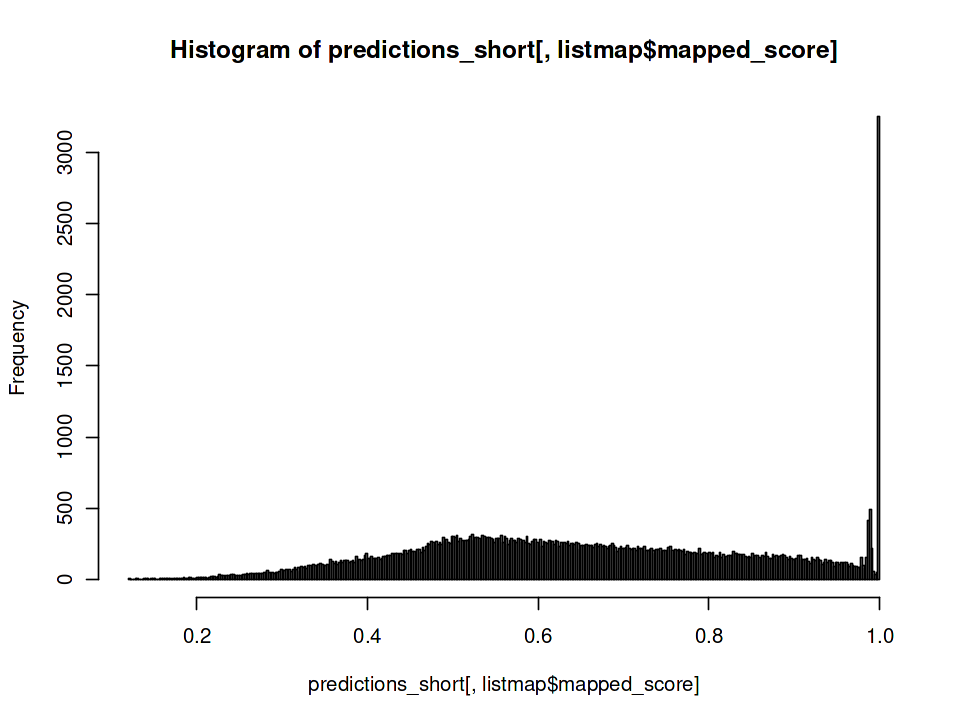

In [60]:
options(repr.plot.width=8, repr.plot.height=6)
hist(predictions_short[,listmap$mapped_score],breaks = 500)

In [61]:
saveRDS(predictions, paste0(listmap$pca_name2,'predictions.rds'))

In [62]:
saveRDS(anchors, paste0(listmap$pca_name2,'anchors.rds'))

## with 4000 variable features (4k) with 100 pca (v4k_pca100)

In [63]:
rm(listmap)

In [64]:
listmap <- list()
listmap$nvariables <- 4000
listmap$regress <-  c("nFeature_originalexp", "nCount_originalexp", "percent.mt", "percent.ribo", "G2M_score", "S_score")
listmap$pca_name <- 'v4k_pca100'
listmap$pca_name2 <- 'v4k_pca100_'
listmap$npcs = 100
listmap$dims = 1:100
listmap$umap = 'UMAP'
listmap$mapped_id <- 'v4k_pca100_predicted.id'
listmap$mapped_score <- 'v4k_pca100_prediction.score.max'

In [65]:
# Findvariable Features
# seurat_atlas <- FindVariableFeatures(object = seurat_atlas, nfeatures = listmap$nvariables)

In [66]:
# Regression
# seurat_atlas <- ScaleData(object = seurat_atlas, 
#                          features = VariableFeatures(seurat_atlas),
#                          vars.to.regress = listmap$regress,
#                          block.size = 20000)

In [67]:
length(VariableFeatures(seurat_atlas))

[1] 4000

In [68]:
# Run PCA 
seurat_atlas <- RunPCA(seurat_atlas,
                       reduction.name = listmap$pca_name,
                       npcs = listmap$npcs, 
                       features =  VariableFeatures(seurat_atlas)
                      )

PC_ 1 
Positive:  Folr1, Apom, Amn, Rbp4, Apoa1, Ttr, Ctsh, Cubn, Apoa4, 2610528J11Rik 
	   Lgals2, Apob, Pla2g12b, Tmem37, Mt1, Car7, Aldob, Fgb, Spink1, Trap1a 
	   2210011C24Rik, Slc2a2, Lgmn, Slc39a5, 4933402E13Rik, Gipc2, Fmr1nb, Apoc1, Apoe, Reep6 
Negative:  Tmsb10, Tuba1a, Ifitm2, Marcks, 2810417H13Rik, Basp1, Gnas, Hmga2, Vim, Cald1 
	   Mdk, Marcksl1, Nedd4, Acta2, Sox4, Tpm4, Tpm1, H2afy2, Fscn1, Serpinh1 
	   Ttc3, Tagln, Eid1, Stmn1, Tmsb4x, Fabp5, Hmgb3, Nrp1, Ccnd2, Cnn2 
PC_ 2 
Positive:  Car2, Elf5, Fabp3, Hdgf, Gypa, Gjb3, Prss50, Alas2, Gpx1, Perp 
	   Tex19.1, Dppa4, Htra1, Gm9, Nr0b1, Sfn, Zfp42, Ccnd3, Ddah1, Cldn3 
	   Mrap, Slc4a1, Blvrb, Gjb5, Cited4, Trim10, Tfap2c, Slc25a37, Hemgn, Klf1 
Negative:  Mdk, Gpc3, Bex2, Ctsl, Apom, Pla2g12b, Dab2, Apoa4, Id3, Ctsh 
	   Amn, Aldob, Lgals2, Car7, Fgb, Cubn, Stmn1, Apoa1, Gipc2, Crabp2 
	   Ttr, Serpinh1, Slc2a2, Slc39a5, Apob, Pcbd1, Hsp90b1, Sox11, 2210011C24Rik, Rbp4 
PC_ 3 
Positive:  Gypa, Alas2, Prdx2, Cited4, 

In [69]:
# with merged_pca (no integration)
anchors <- FindTransferAnchors(reference = seurat_atlas, query = seurat_query, dims = listmap$dims, reference.reduction = listmap$pca_name)
predictions <- TransferData(anchorset = anchors, refdata = seurat_atlas$celltype_extended_atlas, dims = listmap$dims )

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 2700 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [70]:
predictions_short <- predictions[, c('predicted.id','prediction.score.max')]
colnames(predictions_short) <- paste0(listmap$pca_name2, colnames(predictions_short))
head(predictions_short)

,v4k_pca100_predicted.id,v4k_pca100_prediction.score.max
,<chr>,<dbl>
AAACCCAAGAATTCAG-1_1,Epiblast,0.8866690
AAACCCAAGATCACCT-1_1,Mesenchyme,0.6048621
AAACCCAAGCAGGGAG-1_1,Mesenchyme,0.3907387
AAACCCAAGCGCAATG-1_1,Mesenchyme,0.6151522
AAACCCAAGCTGGTGA-1_1,Allantois,0.8963179
AAACCCAAGGGCCAAT-1_1,EMP,0.9697542


In [71]:
seurat_query <- AddMetaData(seurat_query, metadata = predictions_short)

In [ ]:
# make sure your UMAP reduction name is correct
reduction_to_plot <- listmap$umap    # or "pca_harmony_umap_1" if that really is your slot

# get all the unique extended‐type labels (including NA if present)
conditions <- unique(seurat_query@meta.data[,listmap$mapped_id])

Idents(seurat_query) <- listmap$mapped_id

options(repr.plot.width=8, repr.plot.height=6)
for (cond in conditions) {
	# skip NA if you don't care to plot it
	if (is.na(cond)) next
	
	# grab the cells of that type
	cells_of_interest <- WhichCells(
		object    = seurat_query,
		 idents =  cond
	)
	
	# make the plot
	p <- DimPlot(
		object          = seurat_query,
		reduction       = reduction_to_plot,
		cells.highlight = cells_of_interest,
		cols.highlight  = "firebrick",   # or any color you like
		cols            = "lightgrey",   # background cells
		pt.size         = 0.5, alpha = 0.5
	) +
		NoAxes()+NoLegend() +
		ggtitle(cond)
	
	print(p)
}


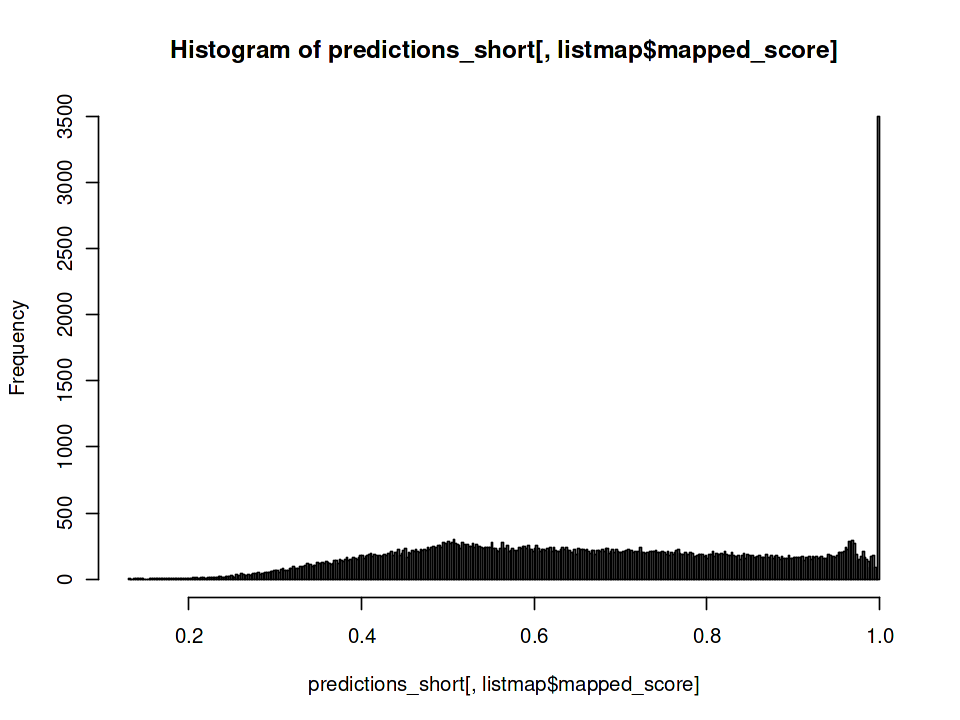

In [73]:
options(repr.plot.width=8, repr.plot.height=6)
hist(predictions_short[,listmap$mapped_score],breaks = 500)

In [74]:
saveRDS(predictions, paste0(listmap$pca_name2,'predictions.rds'))

In [75]:
saveRDS(anchors, paste0(listmap$pca_name2,'anchors.rds'))

## with 7000 variable features (7k) with 50 pca (v7k_pca50)

In [76]:
rm(listmap)

In [77]:
listmap <- list()
listmap$nvariables <- 7000
listmap$regress <-  c("nFeature_originalexp", "nCount_originalexp", "percent.mt", "percent.ribo", "G2M_score", "S_score")
listmap$pca_name <- 'v7k_pca50'
listmap$pca_name2 <- 'v7k_pca50_'
listmap$npcs = 50
listmap$dims = 1:50
listmap$umap = 'UMAP'
listmap$mapped_id <- 'v7k_pca50_predicted.id'
listmap$mapped_score <- 'v7k_pca50_prediction.score.max'

In [78]:
# Findvariable Features
seurat_atlas <- FindVariableFeatures(object = seurat_atlas, nfeatures = listmap$nvariables)

In [79]:
# Regression
seurat_atlas <- ScaleData(object = seurat_atlas, 
                          features = VariableFeatures(seurat_atlas),
                          vars.to.regress = listmap$regress,
                          block.size = 20000)

Regressing out nFeature_originalexp, nCount_originalexp, percent.mt, percent.ribo, G2M_score, S_score

Centering and scaling data matrix



In [80]:
length(VariableFeatures(seurat_atlas))

[1] 7000

In [81]:
# Run PCA 
seurat_atlas <- RunPCA(seurat_atlas,
                       reduction.name = listmap$pca_name,
                       npcs = listmap$npcs, 
                       features =  VariableFeatures(seurat_atlas)
                      )

PC_ 1 
Positive:  Folr1, Amn, Rbp4, Apom, Apoa1, Ttr, Mt1, Ctsh, Trap1a, 2610528J11Rik 
	   Cubn, Apoa4, Tmem37, Apob, Lgals2, Pla2g12b, Car7, Ftl1, Aldob, Apoc1 
	   Fmr1nb, Ass1, Fgb, Apoe, Spink1, Lgmn, 2210011C24Rik, Mt2, Slc2a2, Slc39a5 
Negative:  Tmsb10, Tuba1a, Marcks, Gnas, Basp1, Ifitm2, 2810417H13Rik, Hmga2, Mdk, Vim 
	   Nedd4, Cald1, Sox4, Marcksl1, H2afy2, Serpinh1, Ttc3, Tpm4, Stmn1, Tpm1 
	   Eid1, Acta2, Cnn3, Fscn1, Tmsb4x, Fabp5, Ccnd2, Sox11, Hmgb3, Tagln 
PC_ 2 
Positive:  Car2, Hdgf, Elf5, Fabp3, Gypa, Gjb3, Prss50, Perp, Gpx1, Dppa4 
	   Alas2, Ccnd3, Htra1, Gm9, Tex19.1, Sfn, Nr0b1, Zfp42, Cldn3, Gjb5 
	   Ddah1, Mrap, Tfap2c, Slc4a1, Asns, Dnmt3l, Trim10, Cited4, Blvrb, Slc25a37 
Negative:  Apom, Apoa4, Pla2g12b, Ctsl, Ctsh, Amn, Mdk, Aldob, Lgals2, Dab2 
	   Car7, Cubn, Fgb, Apoa1, Ttr, Gpc3, Rbp4, Bex2, Gipc2, Apob 
	   Slc2a2, Slc39a5, 2210011C24Rik, Spink1, Pcbd1, Adora2b, Slc13a4, Npl, Smlr1, Pdzk1 
PC_ 3 
Positive:  Gypa, Alas2, Cited4, Prdx2, Klf1, Blvrb

In [82]:
# with merged_pca (no integration)
anchors <- FindTransferAnchors(reference = seurat_atlas, query = seurat_query, dims = listmap$dims, reference.reduction = listmap$pca_name)
predictions <- TransferData(anchorset = anchors, refdata = seurat_atlas$celltype_extended_atlas, dims = listmap$dims )

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 2186 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [83]:
predictions_short <- predictions[, c('predicted.id','prediction.score.max')]
colnames(predictions_short) <- paste0(listmap$pca_name2, colnames(predictions_short))
head(predictions_short)

,v7k_pca50_predicted.id,v7k_pca50_prediction.score.max
,<chr>,<dbl>
AAACCCAAGAATTCAG-1_1,Epiblast,0.8600808
AAACCCAAGATCACCT-1_1,Mesenchyme,0.5806942
AAACCCAAGCAGGGAG-1_1,Pharyngeal mesoderm,0.3349580
AAACCCAAGCGCAATG-1_1,Mesenchyme,0.6435563
AAACCCAAGCTGGTGA-1_1,Allantois,0.7587812
AAACCCAAGGGCCAAT-1_1,EMP,0.8999474


In [84]:
seurat_query <- AddMetaData(seurat_query, metadata = predictions_short)

In [ ]:
# make sure your UMAP reduction name is correct
reduction_to_plot <- listmap$umap    # or "pca_harmony_umap_1" if that really is your slot

# get all the unique extended‐type labels (including NA if present)
conditions <- unique(seurat_query@meta.data[,listmap$mapped_id])

Idents(seurat_query) <- listmap$mapped_id

options(repr.plot.width=8, repr.plot.height=6)
for (cond in conditions) {
	# skip NA if you don't care to plot it
	if (is.na(cond)) next
	
	# grab the cells of that type
	cells_of_interest <- WhichCells(
		object    = seurat_query,
		 idents =  cond
	)
	
	# make the plot
	p <- DimPlot(
		object          = seurat_query,
		reduction       = reduction_to_plot,
		cells.highlight = cells_of_interest,
		cols.highlight  = "firebrick",   # or any color you like
		cols            = "lightgrey",   # background cells
		pt.size         = 0.5, alpha = 0.5
	) +
		NoAxes()+NoLegend() +
		ggtitle(cond)
	
	print(p)
}



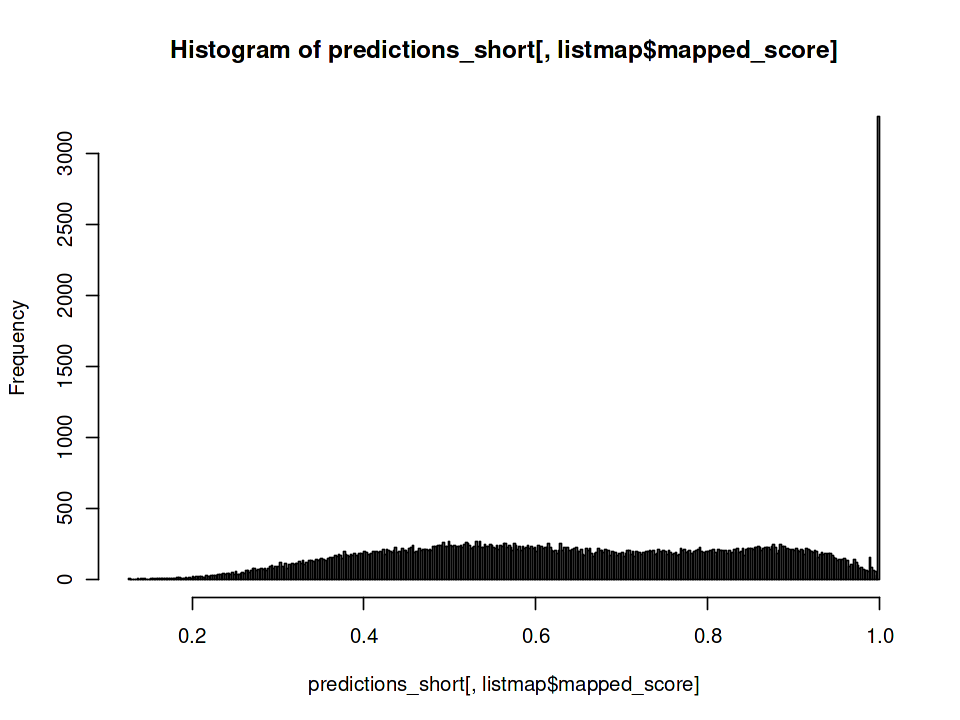

In [86]:
options(repr.plot.width=8, repr.plot.height=6)
hist(predictions_short[,listmap$mapped_score],breaks = 500)

In [87]:
saveRDS(predictions, paste0(listmap$pca_name2,'predictions.rds'))

In [88]:
saveRDS(anchors, paste0(listmap$pca_name2,'anchors.rds'))

## with 7000 variable features (7k) with 75 pca (v7k_pca75)

In [89]:
rm(listmap)

In [90]:
listmap <- list()
listmap$nvariables <- 7000
listmap$regress <-  c("nFeature_originalexp", "nCount_originalexp", "percent.mt", "percent.ribo", "G2M_score", "S_score")
listmap$pca_name <- 'v7k_pca75'
listmap$pca_name2 <- 'v7k_pca75_'
listmap$npcs = 75
listmap$dims = 1:75
listmap$umap = 'UMAP'
listmap$mapped_id <- 'v7k_pca75_predicted.id'
listmap$mapped_score <- 'v7k_pca75_prediction.score.max'

In [91]:
listmap

$nvariables
[1] 7000

$regress
[1] "nFeature_originalexp" "nCount_originalexp"   "percent.mt"          
[4] "percent.ribo"         "G2M_score"            "S_score"             

$pca_name
[1] "v7k_pca75"

$pca_name2
[1] "v7k_pca75_"

$npcs
[1] 75

$dims
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75

$umap
[1] "UMAP"

$mapped_id
[1] "v7k_pca75_predicted.id"

$mapped_score
[1] "v7k_pca75_prediction.score.max"

In [92]:
# Findvariable Features
#seurat_atlas <- FindVariableFeatures(object = seurat_atlas, nfeatures = listmap$nvariables)

In [93]:
# Regression
#seurat_atlas <- ScaleData(object = seurat_atlas, 
#                          features = VariableFeatures(seurat_atlas),
#                          vars.to.regress = listmap$regress,
#                          block.size = 20000)

In [94]:
length(VariableFeatures(seurat_atlas))

[1] 7000

In [95]:
# Run PCA 
seurat_atlas <- RunPCA(seurat_atlas,
                       reduction.name = listmap$pca_name,
                       npcs = listmap$npcs, 
                       features =  VariableFeatures(seurat_atlas)
                      )

PC_ 1 
Positive:  Tmsb10, Tuba1a, Marcks, Gnas, Basp1, Ifitm2, 2810417H13Rik, Hmga2, Mdk, Vim 
	   Nedd4, Cald1, Sox4, Marcksl1, H2afy2, Serpinh1, Ttc3, Tpm4, Stmn1, Tpm1 
	   Eid1, Acta2, Cnn3, Fscn1, Tmsb4x, Fabp5, Ccnd2, Sox11, Hmgb3, Tagln 
Negative:  Folr1, Amn, Rbp4, Apom, Apoa1, Ttr, Mt1, Ctsh, Trap1a, 2610528J11Rik 
	   Cubn, Apoa4, Tmem37, Apob, Lgals2, Pla2g12b, Car7, Ftl1, Aldob, Apoc1 
	   Fmr1nb, Ass1, Fgb, Apoe, Spink1, Lgmn, 2210011C24Rik, Mt2, Slc2a2, Slc39a5 
PC_ 2 
Positive:  Car2, Hdgf, Elf5, Fabp3, Gypa, Gjb3, Prss50, Perp, Gpx1, Dppa4 
	   Alas2, Ccnd3, Htra1, Gm9, Tex19.1, Sfn, Nr0b1, Zfp42, Cldn3, Gjb5 
	   Ddah1, Mrap, Tfap2c, Slc4a1, Asns, Dnmt3l, Trim10, Cited4, Blvrb, Slc25a37 
Negative:  Apom, Apoa4, Pla2g12b, Ctsl, Ctsh, Amn, Mdk, Aldob, Lgals2, Dab2 
	   Car7, Cubn, Fgb, Apoa1, Ttr, Gpc3, Rbp4, Bex2, Gipc2, Apob 
	   Slc2a2, Slc39a5, 2210011C24Rik, Spink1, Pcbd1, Adora2b, Slc13a4, Npl, Smlr1, Pdzk1 
PC_ 3 
Positive:  Gypa, Alas2, Cited4, Prdx2, Klf1, Blvrb

In [96]:
# with merged_pca (no integration)
anchors <- FindTransferAnchors(reference = seurat_atlas, query = seurat_query, dims = listmap$dims, reference.reduction = listmap$pca_name)
predictions <- TransferData(anchorset = anchors, refdata = seurat_atlas$celltype_extended_atlas, dims = listmap$dims )

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 2045 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [97]:
predictions_short <- predictions[, c('predicted.id','prediction.score.max')]
colnames(predictions_short) <- paste0(listmap$pca_name2, colnames(predictions_short))
head(predictions_short)

,v7k_pca75_predicted.id,v7k_pca75_prediction.score.max
,<chr>,<dbl>
AAACCCAAGAATTCAG-1_1,Epiblast,0.6724699
AAACCCAAGATCACCT-1_1,Epicardium,0.5085634
AAACCCAAGCAGGGAG-1_1,Mesenchyme,0.3603304
AAACCCAAGCGCAATG-1_1,Mesenchyme,0.4877441
AAACCCAAGCTGGTGA-1_1,Allantois,0.6454530
AAACCCAAGGGCCAAT-1_1,EMP,0.9059886


In [98]:
seurat_query <- AddMetaData(seurat_query, metadata = predictions_short)

In [ ]:
# make sure your UMAP reduction name is correct
reduction_to_plot <- listmap$umap    # or "pca_harmony_umap_1" if that really is your slot

# get all the unique extended‐type labels (including NA if present)
conditions <- unique(seurat_query@meta.data[,listmap$mapped_id])

Idents(seurat_query) <- listmap$mapped_id

options(repr.plot.width=8, repr.plot.height=6)
for (cond in conditions) {
	# skip NA if you don't care to plot it
	if (is.na(cond)) next
	
	# grab the cells of that type
	cells_of_interest <- WhichCells(
		object    = seurat_query,
		 idents =  cond
	)
	
	# make the plot
	p <- DimPlot(
		object          = seurat_query,
		reduction       = reduction_to_plot,
		cells.highlight = cells_of_interest,
		cols.highlight  = "firebrick",   # or any color you like
		cols            = "lightgrey",   # background cells
		pt.size         = 0.5, alpha = 0.5
	) +
		NoAxes()+NoLegend() +
		ggtitle(cond)
	
	print(p)
}


In [100]:
listmap$mapped_id

[1] "v7k_pca75_predicted.id"

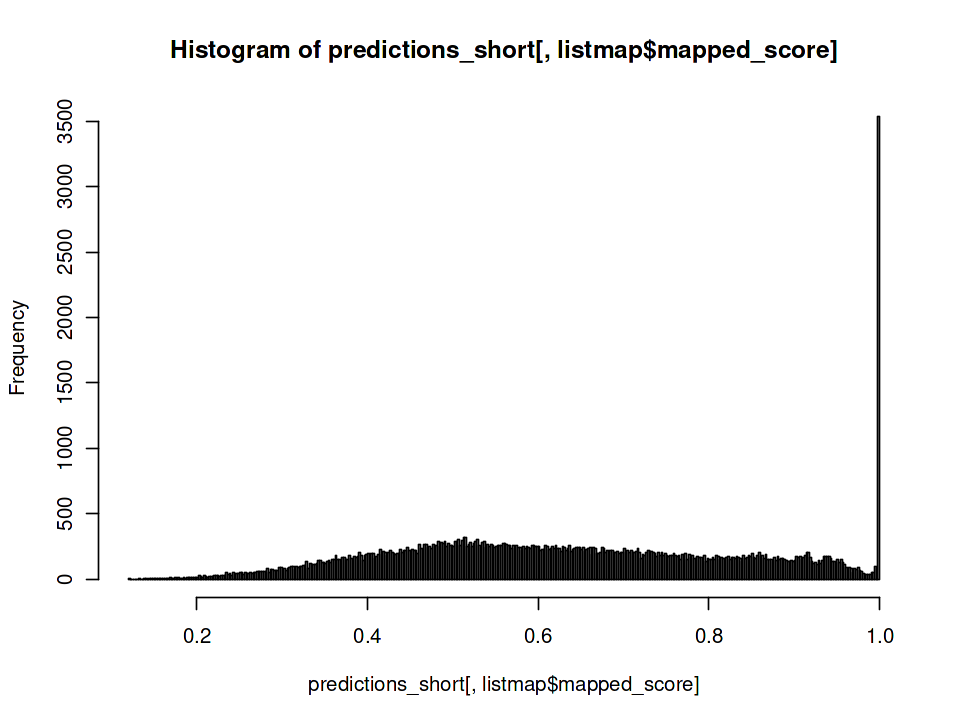

In [101]:
options(repr.plot.width=8, repr.plot.height=6)
hist(predictions_short[,listmap$mapped_score],breaks = 500)

In [102]:
saveRDS(predictions, paste0(listmap$pca_name2,'predictions.rds'))

In [103]:
saveRDS(anchors, paste0(listmap$pca_name2,'anchors.rds'))

## with 7000 variable features (7k) with 100 pca (v7k_pca100)

In [104]:
rm(listmap)

In [105]:
listmap <- list()
listmap$nvariables <- 7000
listmap$regress <-  c("nFeature_originalexp", "nCount_originalexp", "percent.mt", "percent.ribo", "G2M_score", "S_score")
listmap$pca_name <- 'v7k_pca100'
listmap$pca_name2 <- 'v7k_pca100_'
listmap$npcs = 100
listmap$dims = 1:100
listmap$umap = 'UMAP'
listmap$mapped_id <- 'v7k_pca100_predicted.id'
listmap$mapped_score <- 'v7k_pca100_prediction.score.max'

In [106]:
# Findvariable Features
# seurat_atlas <- FindVariableFeatures(object = seurat_atlas, nfeatures = listmap$nvariables)

In [107]:
# Regression
# seurat_atlas <- ScaleData(object = seurat_atlas, 
#                          features = VariableFeatures(seurat_atlas),
#                          vars.to.regress = listmap$regress,
#                          block.size = 20000)

In [108]:
length(VariableFeatures(seurat_atlas))

[1] 7000

In [109]:
# Run PCA 
seurat_atlas <- RunPCA(seurat_atlas,
                       reduction.name = listmap$pca_name,
                       npcs = listmap$npcs, 
                       features =  VariableFeatures(seurat_atlas)
                      )

PC_ 1 
Positive:  Folr1, Amn, Rbp4, Apom, Apoa1, Ttr, Mt1, Ctsh, Trap1a, 2610528J11Rik 
	   Cubn, Apoa4, Tmem37, Apob, Lgals2, Pla2g12b, Car7, Ftl1, Aldob, Apoc1 
	   Fmr1nb, Ass1, Fgb, Apoe, Spink1, Lgmn, 2210011C24Rik, Mt2, Slc2a2, Slc39a5 
Negative:  Tmsb10, Tuba1a, Marcks, Gnas, Basp1, Ifitm2, 2810417H13Rik, Hmga2, Mdk, Vim 
	   Nedd4, Cald1, Sox4, Marcksl1, H2afy2, Serpinh1, Ttc3, Tpm4, Stmn1, Tpm1 
	   Eid1, Acta2, Cnn3, Fscn1, Tmsb4x, Fabp5, Ccnd2, Sox11, Hmgb3, Tagln 
PC_ 2 
Positive:  Car2, Hdgf, Elf5, Fabp3, Gypa, Gjb3, Prss50, Perp, Gpx1, Dppa4 
	   Alas2, Ccnd3, Htra1, Gm9, Tex19.1, Sfn, Nr0b1, Zfp42, Cldn3, Gjb5 
	   Ddah1, Mrap, Tfap2c, Slc4a1, Asns, Dnmt3l, Trim10, Cited4, Blvrb, Slc25a37 
Negative:  Apom, Apoa4, Pla2g12b, Ctsl, Ctsh, Amn, Mdk, Aldob, Lgals2, Dab2 
	   Car7, Cubn, Fgb, Apoa1, Ttr, Gpc3, Rbp4, Bex2, Gipc2, Apob 
	   Slc2a2, Slc39a5, 2210011C24Rik, Spink1, Pcbd1, Adora2b, Slc13a4, Npl, Smlr1, Pdzk1 
PC_ 3 
Positive:  Gypa, Alas2, Cited4, Prdx2, Klf1, Blvrb

In [110]:
# with merged_pca (no integration)
anchors <- FindTransferAnchors(reference = seurat_atlas, query = seurat_query, dims = listmap$dims, reference.reduction = listmap$pca_name)
predictions <- TransferData(anchorset = anchors, refdata = seurat_atlas$celltype_extended_atlas, dims = listmap$dims )

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 1944 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [111]:
predictions_short <- predictions[, c('predicted.id','prediction.score.max')]
colnames(predictions_short) <- paste0(listmap$pca_name2, colnames(predictions_short))
head(predictions_short)

,v7k_pca100_predicted.id,v7k_pca100_prediction.score.max
,<chr>,<dbl>
AAACCCAAGAATTCAG-1_1,Epiblast,0.7509314
AAACCCAAGATCACCT-1_1,Mesenchyme,0.4910338
AAACCCAAGCAGGGAG-1_1,Mesenchyme,0.3115661
AAACCCAAGCGCAATG-1_1,Mesenchyme,0.5109963
AAACCCAAGCTGGTGA-1_1,Allantois,0.9302123
AAACCCAAGGGCCAAT-1_1,EMP,0.9246539


In [ ]:
seurat_query <- AddMetaData(seurat_query, metadata = predictions_short)

In [ ]:
# make sure your UMAP reduction name is correct
reduction_to_plot <- listmap$umap    # or "pca_harmony_umap_1" if that really is your slot

# get all the unique extended‐type labels (including NA if present)
conditions <- unique(seurat_query@meta.data[,listmap$mapped_id])

Idents(seurat_query) <- listmap$mapped_id

options(repr.plot.width=8, repr.plot.height=6)
for (cond in conditions) {
	# skip NA if you don't care to plot it
	if (is.na(cond)) next
	
	# grab the cells of that type
	cells_of_interest <- WhichCells(
		object    = seurat_query,
		 idents =  cond
	)
	
	# make the plot
	p <- DimPlot(
		object          = seurat_query,
		reduction       = reduction_to_plot,
		cells.highlight = cells_of_interest,
		cols.highlight  = "firebrick",   # or any color you like
		cols            = "lightgrey",   # background cells
		pt.size         = 0.5, alpha = 0.5
	) +
		NoAxes()+NoLegend() +
		ggtitle(cond)
	
	print(p)
}

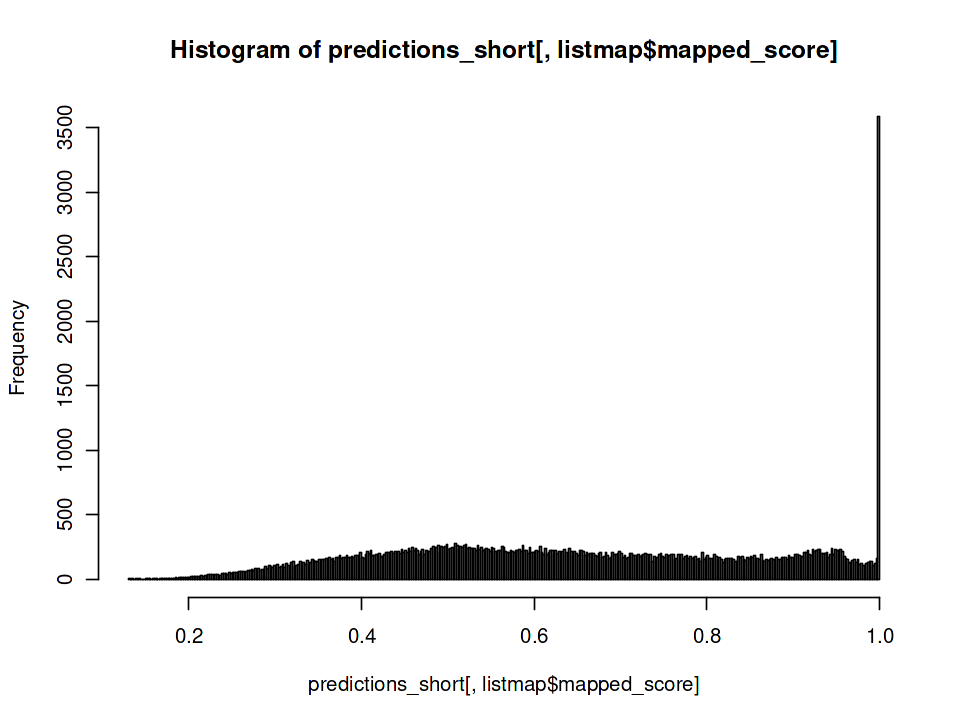

In [114]:
options(repr.plot.width=8, repr.plot.height=6)
hist(predictions_short[,listmap$mapped_score],breaks = 500)

In [115]:
saveRDS(predictions, paste0(listmap$pca_name2,'predictions.rds'))

In [116]:
saveRDS(anchors, paste0(listmap$pca_name2,'anchors.rds'))

## with 10000 variable features (10k) with 50 pca (v10k_pca50)

In [117]:
rm(listmap)

In [118]:
listmap <- list()
listmap$nvariables <- 10000
listmap$regress <-  c("nFeature_originalexp", "nCount_originalexp", "percent.mt", "percent.ribo", "G2M_score", "S_score")
listmap$pca_name <- 'v10k_pca50'
listmap$pca_name2 <- 'v10k_pca50_'
listmap$npcs = 50
listmap$dims = 1:50
listmap$umap = 'UMAP'
listmap$mapped_id <- 'v10k_pca50_predicted.id'
listmap$mapped_score <- 'v10k_pca50_prediction.score.max'

In [119]:
# Findvariable Features
seurat_atlas <- FindVariableFeatures(object = seurat_atlas, nfeatures = listmap$nvariables)

In [120]:
# Regression
seurat_atlas <- ScaleData(object = seurat_atlas, 
                          features = VariableFeatures(seurat_atlas),
                          vars.to.regress = listmap$regress,
                          block.size = 20000)

Regressing out nFeature_originalexp, nCount_originalexp, percent.mt, percent.ribo, G2M_score, S_score

Centering and scaling data matrix



In [121]:
length(VariableFeatures(seurat_atlas))

[1] 10000

In [122]:
# Run PCA 
seurat_atlas <- RunPCA(seurat_atlas,
                       reduction.name = listmap$pca_name,
                       npcs = listmap$npcs, 
                       features =  VariableFeatures(seurat_atlas)
                      )

PC_ 1 
Positive:  Tmsb10, H3f3a, Tuba1a, Marcks, Gnas, Basp1, 2810417H13Rik, Ifitm2, Mdk, Hmga2 
	   Nedd4, Vim, Sox4, Cald1, H2afy2, Anp32a, Serpinh1, Ttc3, Stmn1, Marcksl1 
	   Eid1, Tpm4, Sox11, Hnrnpa0, Tpm1, Fabp5, Ccnd2, Tmsb4x, Prtg, Fscn1 
Negative:  Folr1, Mt1, Trap1a, Rbp4, Amn, Apoa1, Apom, Ttr, Ftl1, Ctsh 
	   Tmem37, 2610528J11Rik, Ass1, Cubn, Apoc1, Fmr1nb, Apoa4, Apob, Lgals2, Mt2 
	   Apoe, Car7, Pla2g12b, Aldob, Lgmn, Fgb, Spink1, Ctsb, Cldn6, 2210011C24Rik 
PC_ 2 
Positive:  Car2, Hdgf, Elf5, Gypa, Fabp3, Alas2, Ccnd3, Gpx1, Prss50, Gjb3 
	   Perp, Dppa4, Htra1, Mrap, Asns, Gm9, Nr0b1, Sfn, Slc4a1, Eif4ebp1 
	   Tex19.1, Zfp42, Trim10, Gjb5, Cited4, Slc25a37, Hprt, Klf1, Hemgn, Cldn3 
Negative:  Apom, Apoa4, Pla2g12b, Amn, Ctsh, Lgals2, Aldob, Car7, Ctsl, Cubn 
	   Dab2, Fgb, Apoa1, Ttr, Rbp4, Apob, Gipc2, Slc39a5, Slc2a2, 2210011C24Rik 
	   Spink1, Pcbd1, Slc13a4, Adora2b, Npl, Smlr1, 2610528J11Rik, 4933402E13Rik, Pdzk1, Creb3l3 
PC_ 3 
Positive:  Gypa, Cited4, Alas2

In [123]:
# with merged_pca (no integration)
anchors <- FindTransferAnchors(reference = seurat_atlas, query = seurat_query, dims = listmap$dims, reference.reduction = listmap$pca_name)
predictions <- TransferData(anchorset = anchors, refdata = seurat_atlas$celltype_extended_atlas, dims = listmap$dims )

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 1388 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [124]:
predictions_short <- predictions[, c('predicted.id','prediction.score.max')]
colnames(predictions_short) <- paste0(listmap$pca_name2, colnames(predictions_short))
head(predictions_short)

,v10k_pca50_predicted.id,v10k_pca50_prediction.score.max
,<chr>,<dbl>
AAACCCAAGAATTCAG-1_1,Epiblast,0.7134057
AAACCCAAGATCACCT-1_1,Mesenchyme,0.6855513
AAACCCAAGCAGGGAG-1_1,Epicardium,0.2730642
AAACCCAAGCGCAATG-1_1,Mesenchyme,0.4338889
AAACCCAAGCTGGTGA-1_1,Allantois,0.7580683
AAACCCAAGGGCCAAT-1_1,EMP,0.8078730


In [ ]:
seurat_query <- AddMetaData(seurat_query, metadata = predictions_short)

In [ ]:
# make sure your UMAP reduction name is correct
reduction_to_plot <- listmap$umap    # or "pca_harmony_umap_1" if that really is your slot

# get all the unique extended‐type labels (including NA if present)
conditions <- unique(seurat_query@meta.data[,listmap$mapped_id])

Idents(seurat_query) <- listmap$mapped_id

options(repr.plot.width=8, repr.plot.height=6)
for (cond in conditions) {
	# skip NA if you don't care to plot it
	if (is.na(cond)) next
	
	# grab the cells of that type
	cells_of_interest <- WhichCells(
		object    = seurat_query,
		 idents =  cond
	)
	
	# make the plot
	p <- DimPlot(
		object          = seurat_query,
		reduction       = reduction_to_plot,
		cells.highlight = cells_of_interest,
		cols.highlight  = "firebrick",   # or any color you like
		cols            = "lightgrey",   # background cells
		pt.size         = 0.5, alpha = 0.5
	) +
		NoAxes()+NoLegend() +
		ggtitle(cond)
	
	print(p)
}


In [ ]:
# make sure your UMAP reduction name is correct
reduction_to_plot <- listmap$umap    # or "pca_harmony_umap_1" if that really is your slot

# get all the unique extended‐type labels (including NA if present)
conditions <- unique(seurat_query@meta.data[, 'v10k_pca50_predicted.id'])

Idents(seurat_query) <- 'v10k_pca50_predicted.id'

options(repr.plot.width=8, repr.plot.height=6)
for (cond in conditions) {
	# skip NA if you don't care to plot it
	if (is.na(cond)) next
	
	# grab the cells of that type
	cells_of_interest <- WhichCells(
		object    = seurat_query,
		 idents =  cond
	)
	
	# make the plot
	p <- DimPlot(
		object          = seurat_query,
		reduction       = reduction_to_plot,
		cells.highlight = cells_of_interest,
		cols.highlight  = "firebrick",   # or any color you like
		cols            = "lightgrey",   # background cells
		pt.size         = 0.5, alpha = 0.5
	) +
		NoAxes()+NoLegend() +
		ggtitle(cond)
	
	print(p)
}


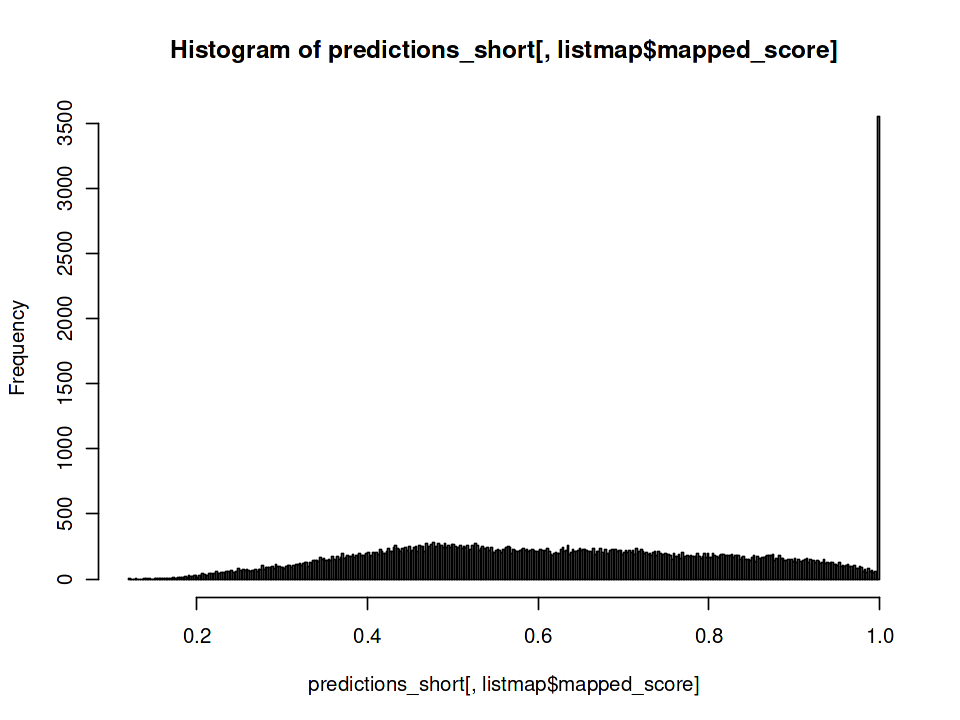

In [128]:
options(repr.plot.width=8, repr.plot.height=6)
hist(predictions_short[,listmap$mapped_score],breaks = 500)

In [129]:
saveRDS(predictions, paste0(listmap$pca_name2,'predictions.rds'))

In [130]:
saveRDS(anchors, paste0(listmap$pca_name2,'anchors.rds'))

## with 10000 variable features (10k) with 75 pca (v10k_pca75)

In [131]:
rm(listmap)

In [132]:
listmap <- list()
listmap$nvariables <- 10000
listmap$regress <-  c("nFeature_originalexp", "nCount_originalexp", "percent.mt", "percent.ribo", "G2M_score", "S_score")
listmap$pca_name <- 'v10k_pca75'
listmap$pca_name2 <- 'v10k_pca75_'
listmap$npcs = 75
listmap$dims = 1:75
listmap$umap = 'UMAP'
listmap$mapped_id <- 'v10k_pca75_predicted.id'
listmap$mapped_score <- 'v10k_pca75_prediction.score.max'

In [133]:
listmap

$nvariables
[1] 10000

$regress
[1] "nFeature_originalexp" "nCount_originalexp"   "percent.mt"          
[4] "percent.ribo"         "G2M_score"            "S_score"             

$pca_name
[1] "v10k_pca75"

$pca_name2
[1] "v10k_pca75_"

$npcs
[1] 75

$dims
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75

$umap
[1] "UMAP"

$mapped_id
[1] "v10k_pca75_predicted.id"

$mapped_score
[1] "v10k_pca75_prediction.score.max"

In [134]:
# Findvariable Features
#seurat_atlas <- FindVariableFeatures(object = seurat_atlas, nfeatures = listmap$nvariables)

In [135]:
# Regression
#seurat_atlas <- ScaleData(object = seurat_atlas, 
#                          features = VariableFeatures(seurat_atlas),
#                          vars.to.regress = listmap$regress,
#                          block.size = 20000)

In [136]:
length(VariableFeatures(seurat_atlas))

[1] 10000

In [137]:
# Run PCA 
seurat_atlas <- RunPCA(seurat_atlas,
                       reduction.name = listmap$pca_name,
                       npcs = listmap$npcs, 
                       features =  VariableFeatures(seurat_atlas)
                      )

PC_ 1 
Positive:  Folr1, Mt1, Trap1a, Rbp4, Amn, Apoa1, Apom, Ttr, Ftl1, Ctsh 
	   Tmem37, 2610528J11Rik, Ass1, Cubn, Apoc1, Fmr1nb, Apoa4, Apob, Lgals2, Mt2 
	   Apoe, Car7, Pla2g12b, Aldob, Lgmn, Fgb, Spink1, Ctsb, Cldn6, 2210011C24Rik 
Negative:  Tmsb10, H3f3a, Tuba1a, Marcks, Gnas, Basp1, 2810417H13Rik, Ifitm2, Mdk, Hmga2 
	   Nedd4, Vim, Sox4, Cald1, H2afy2, Anp32a, Serpinh1, Ttc3, Stmn1, Marcksl1 
	   Eid1, Tpm4, Sox11, Hnrnpa0, Tpm1, Fabp5, Ccnd2, Tmsb4x, Prtg, Fscn1 
PC_ 2 
Positive:  Car2, Hdgf, Elf5, Gypa, Fabp3, Alas2, Ccnd3, Gpx1, Prss50, Gjb3 
	   Perp, Dppa4, Htra1, Mrap, Asns, Gm9, Nr0b1, Sfn, Slc4a1, Eif4ebp1 
	   Tex19.1, Zfp42, Trim10, Gjb5, Cited4, Slc25a37, Hprt, Klf1, Hemgn, Cldn3 
Negative:  Apom, Apoa4, Pla2g12b, Amn, Ctsh, Lgals2, Aldob, Car7, Ctsl, Cubn 
	   Dab2, Fgb, Apoa1, Ttr, Rbp4, Apob, Gipc2, Slc39a5, Slc2a2, 2210011C24Rik 
	   Spink1, Pcbd1, Slc13a4, Adora2b, Npl, Smlr1, 2610528J11Rik, 4933402E13Rik, Pdzk1, Creb3l3 
PC_ 3 
Positive:  Gypa, Cited4, Alas2

In [138]:
# with merged_pca (no integration)
anchors <- FindTransferAnchors(reference = seurat_atlas, query = seurat_query, dims = listmap$dims, reference.reduction = listmap$pca_name)
predictions <- TransferData(anchorset = anchors, refdata = seurat_atlas$celltype_extended_atlas, dims = listmap$dims )

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 1337 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [139]:
predictions_short <- predictions[, c('predicted.id','prediction.score.max')]
colnames(predictions_short) <- paste0(listmap$pca_name2, colnames(predictions_short))
head(predictions_short)

,v10k_pca75_predicted.id,v10k_pca75_prediction.score.max
,<chr>,<dbl>
AAACCCAAGAATTCAG-1_1,Epiblast,0.4705565
AAACCCAAGATCACCT-1_1,Mesenchyme,0.4716276
AAACCCAAGCAGGGAG-1_1,Epicardium,0.4276116
AAACCCAAGCGCAATG-1_1,Epicardium,0.6025947
AAACCCAAGCTGGTGA-1_1,Allantois,0.6707944
AAACCCAAGGGCCAAT-1_1,EMP,0.7733386


In [140]:
seurat_query <- AddMetaData(seurat_query, metadata = predictions_short)

In [ ]:
# make sure your UMAP reduction name is correct
reduction_to_plot <- listmap$umap    # or "pca_harmony_umap_1" if that really is your slot

# get all the unique extended‐type labels (including NA if present)
conditions <- unique(seurat_query@meta.data[,'v10k_pca75_predicted.id'])

Idents(seurat_query) <- 'v10k_pca75_predicted.id'

options(repr.plot.width=8, repr.plot.height=6)
for (cond in conditions) {
	# skip NA if you don't care to plot it
	if (is.na(cond)) next
	
	# grab the cells of that type
	cells_of_interest <- WhichCells(
		object    = seurat_query,
		 idents =  cond
	)
	
	# make the plot
	p <- DimPlot(
		object          = seurat_query,
		reduction       = reduction_to_plot,
		cells.highlight = cells_of_interest,
		cols.highlight  = "firebrick",   # or any color you like
		cols            = "lightgrey",   # background cells
		pt.size         = 0.5, alpha = 0.5
	) +
		NoAxes()+NoLegend() +
		ggtitle(cond)
	
	print(p)
}

In [143]:
listmap$mapped_id

[1] "v10k_pca75_predicted.id"

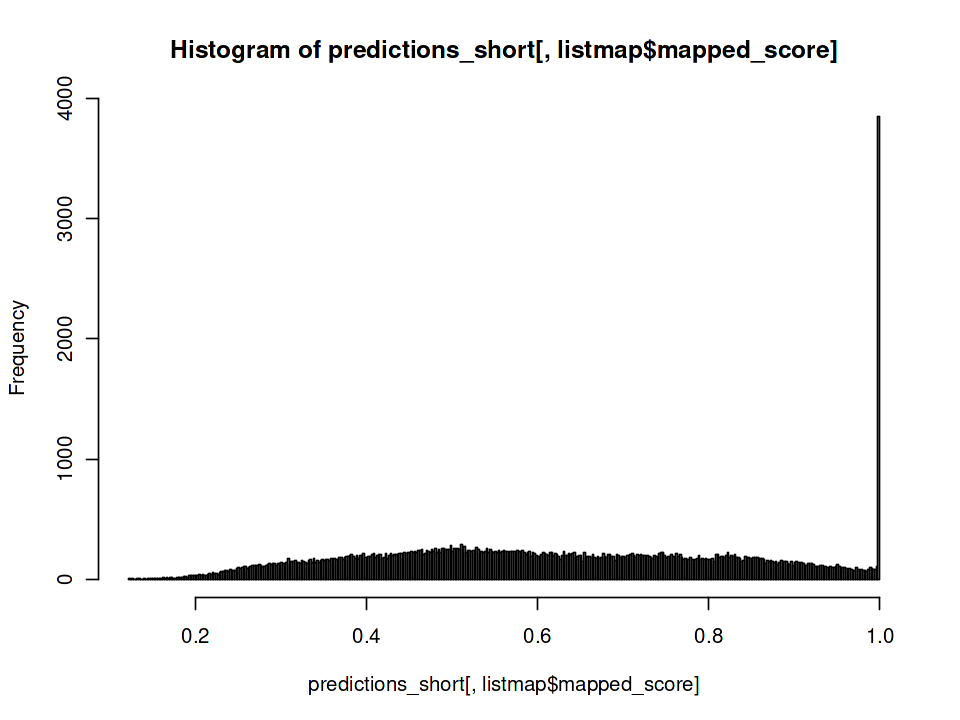

In [144]:
options(repr.plot.width=8, repr.plot.height=6)
hist(predictions_short[,listmap$mapped_score],breaks = 500)

In [145]:
saveRDS(predictions, paste0(listmap$pca_name2,'predictions.rds'))

In [146]:
saveRDS(anchors, paste0(listmap$pca_name2,'anchors.rds'))

## with 10000 variable features (10k) with 100 pca (v10k_pca100)

In [147]:
rm(listmap)

In [148]:
listmap <- list()
listmap$nvariables <- 10000
listmap$regress <-  c("nFeature_originalexp", "nCount_originalexp", "percent.mt", "percent.ribo", "G2M_score", "S_score")
listmap$pca_name <- 'v10k_pca100'
listmap$pca_name2 <- 'v10k_pca100_'
listmap$npcs = 100
listmap$dims = 1:100
listmap$umap = 'UMAP'
listmap$mapped_id <- 'v10k_pca100_predicted.id'
listmap$mapped_score <- 'v10k_pca100_prediction.score.max'

In [149]:
# Findvariable Features
# seurat_atlas <- FindVariableFeatures(object = seurat_atlas, nfeatures = listmap$nvariables)

In [150]:
# Regression
# seurat_atlas <- ScaleData(object = seurat_atlas, 
#                          features = VariableFeatures(seurat_atlas),
#                          vars.to.regress = listmap$regress,
#                          block.size = 20000)

In [151]:
length(VariableFeatures(seurat_atlas))

[1] 10000

In [152]:
# Run PCA 
seurat_atlas <- RunPCA(seurat_atlas,
                       reduction.name = listmap$pca_name,
                       npcs = listmap$npcs, 
                       features =  VariableFeatures(seurat_atlas)
                      )

PC_ 1 
Positive:  Tmsb10, H3f3a, Tuba1a, Marcks, Gnas, Basp1, 2810417H13Rik, Ifitm2, Mdk, Hmga2 
	   Nedd4, Vim, Sox4, Cald1, H2afy2, Anp32a, Serpinh1, Ttc3, Stmn1, Marcksl1 
	   Eid1, Tpm4, Sox11, Hnrnpa0, Tpm1, Fabp5, Ccnd2, Tmsb4x, Prtg, Fscn1 
Negative:  Folr1, Mt1, Trap1a, Rbp4, Amn, Apoa1, Apom, Ttr, Ftl1, Ctsh 
	   Tmem37, 2610528J11Rik, Ass1, Cubn, Apoc1, Fmr1nb, Apoa4, Apob, Lgals2, Mt2 
	   Apoe, Car7, Pla2g12b, Aldob, Lgmn, Fgb, Spink1, Ctsb, Cldn6, 2210011C24Rik 
PC_ 2 
Positive:  Car2, Hdgf, Elf5, Gypa, Fabp3, Alas2, Ccnd3, Gpx1, Prss50, Gjb3 
	   Perp, Dppa4, Htra1, Mrap, Asns, Gm9, Nr0b1, Sfn, Slc4a1, Eif4ebp1 
	   Tex19.1, Zfp42, Trim10, Gjb5, Cited4, Slc25a37, Hprt, Klf1, Hemgn, Cldn3 
Negative:  Apom, Apoa4, Pla2g12b, Amn, Ctsh, Lgals2, Aldob, Car7, Ctsl, Cubn 
	   Dab2, Fgb, Apoa1, Ttr, Rbp4, Apob, Gipc2, Slc39a5, Slc2a2, 2210011C24Rik 
	   Spink1, Pcbd1, Slc13a4, Adora2b, Npl, Smlr1, 2610528J11Rik, 4933402E13Rik, Pdzk1, Creb3l3 
PC_ 3 
Positive:  Gypa, Cited4, Alas2

In [153]:
# with merged_pca (no integration)
anchors <- FindTransferAnchors(reference = seurat_atlas, query = seurat_query, dims = listmap$dims, reference.reduction = listmap$pca_name)
predictions <- TransferData(anchorset = anchors, refdata = seurat_atlas$celltype_extended_atlas, dims = listmap$dims )

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 1329 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [154]:
predictions_short <- predictions[, c('predicted.id','prediction.score.max')]
colnames(predictions_short) <- paste0(listmap$pca_name2, colnames(predictions_short))
head(predictions_short)

,v10k_pca100_predicted.id,v10k_pca100_prediction.score.max
,<chr>,<dbl>
AAACCCAAGAATTCAG-1_1,PGC,0.4662698
AAACCCAAGATCACCT-1_1,Mesenchyme,0.4966959
AAACCCAAGCAGGGAG-1_1,Epicardium,0.3182463
AAACCCAAGCGCAATG-1_1,Mesenchyme,0.4039795
AAACCCAAGCTGGTGA-1_1,Allantois,0.8356926
AAACCCAAGGGCCAAT-1_1,EMP,0.8512432


In [155]:
seurat_query <- AddMetaData(seurat_query, metadata = predictions_short)

In [ ]:
# make sure your UMAP reduction name is correct
reduction_to_plot <- listmap$umap    # or "pca_harmony_umap_1" if that really is your slot

# get all the unique extended‐type labels (including NA if present)
conditions <- unique(seurat_query@meta.data[,listmap$mapped_id])

Idents(seurat_query) <- listmap$mapped_id

options(repr.plot.width=8, repr.plot.height=6)
for (cond in conditions) {
	# skip NA if you don't care to plot it
	if (is.na(cond)) next
	
	# grab the cells of that type
	cells_of_interest <- WhichCells(
		object    = seurat_query,
		 idents =  cond
	)
	
	# make the plot
	p <- DimPlot(
		object          = seurat_query,
		reduction       = reduction_to_plot,
		cells.highlight = cells_of_interest,
		cols.highlight  = "firebrick",   # or any color you like
		cols            = "lightgrey",   # background cells
		pt.size         = 0.5, alpha = 0.5
	) +
		NoAxes()+NoLegend() +
		ggtitle(cond)
	
	print(p)
}

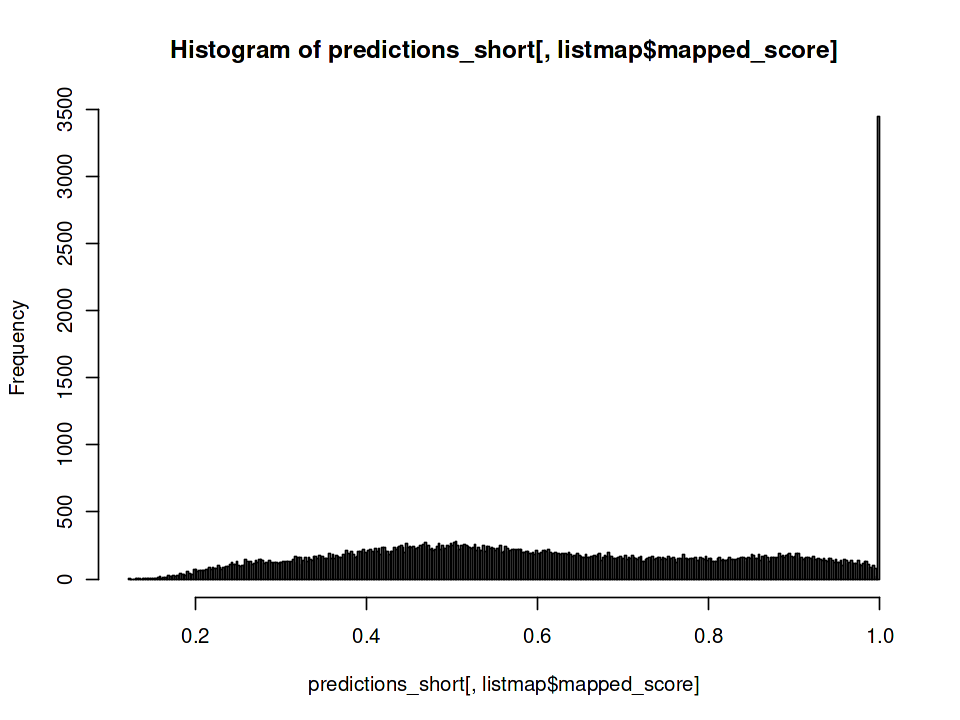

In [157]:
options(repr.plot.width=8, repr.plot.height=6)
hist(predictions_short[,listmap$mapped_score],breaks = 500)

In [158]:
saveRDS(predictions, paste0(listmap$pca_name2,'predictions.rds'))

In [159]:
saveRDS(anchors, paste0(listmap$pca_name2,'anchors.rds'))

# Adding to obj

In [161]:
obj <- readRDS('../../cmoy2_reup.RDS')
obj

An object of class Seurat 
27998 features across 71107 samples within 1 assay 
Active assay: RNA (27998 features, 0 variable features)
 2 layers present: counts, data
 6 dimensional reductions calculated: OLDPCA, OLDUMAP, OLDTSNE, PCA, UMAP, UMAP3D

In [163]:
dim(seurat_query@meta.data)

[1] 71107    61

In [168]:
colnames(seurat_query@meta.data[,44:61])

[1] "v4k_pca50_predicted.id"           "v4k_pca50_prediction.score.max"  
 [3] "v4k_pca75_predicted.id"           "v4k_pca75_prediction.score.max"  
 [5] "v4k_pca100_predicted.id"          "v4k_pca100_prediction.score.max" 
 [7] "v7k_pca50_predicted.id"           "v7k_pca50_prediction.score.max"  
 [9] "v7k_pca75_predicted.id"           "v7k_pca75_prediction.score.max"  
[11] "v7k_pca100_predicted.id"          "v7k_pca100_prediction.score.max" 
[13] "v10k_pca50_predicted.id"          "v10k_pca50_prediction.score.max" 
[15] "v10k_pca75_predicted.id"          "v10k_pca75_prediction.score.max" 
[17] "v10k_pca100_predicted.id"         "v10k_pca100_prediction.score.max"

In [169]:
df <- seurat_query@meta.data[,44:61]

In [170]:
obj <- AddMetaData(obj, metadata = df)

In [171]:
saveRDS(obj,'../../cmo_version3.rds', compress = FALSE)

In [172]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Debian GNU/Linux 12 (bookworm)

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.21.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Amsterdam
tzcode source: system (glibc)

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] future.apply_1.20.0         future_1.58.0              
 [3] argparse_2.2.5              stringr_1.5.1              
 [5] reticul